<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/thermodynamics_of_natural_gas_hydrates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Thermodynamics of natural gas hydrates
#@markdown Demonstration of calulcations related to natura gas hydrates
%%capture
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!pip install py4j
!pip install NeqSim-Colab/lib/neqsim-0.0.1-py3-none-any.whl

In [0]:
#@title Import packages
#@markdown Imports packages such as neqsim, numpy, matplotlib etc.
%%capture
import neqsim
import time
time.sleep(3)
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

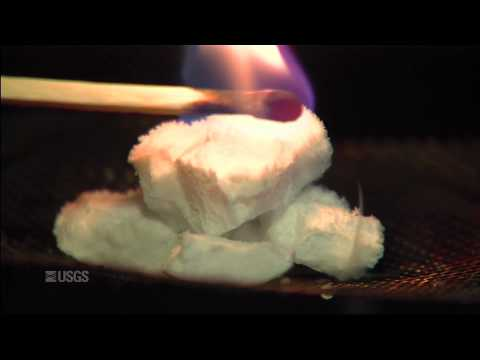

In [3]:
#@title Introduction to Natural gas hydrates
#@markdown This video gives an intriduction to natural gas hydrates
from IPython.display import YouTubeVideo
YouTubeVideo('U46XOoU0DrM', width=600, height=400)

#Hydrate calculations¶
##How to find the hydrate equilibrium temperature
Hydrate temperatures can be found ...

In [4]:
pressure = 150.0 #@param {type:"number"}
thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,pressure)
thermoSystem.addComponent("methane", 90.0)
thermoSystem.addComponent("ethane", 10.0)
thermoSystem.addComponent("propane", 1.0)
thermoSystem.addComponent("water", 4.0)
thermoSystem.setHydrateCheck(True);
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.hydrateFormationTemperature()

print("Hydrate equilibrium temperature ", thermoSystem.getTemperature()-273.15, " C")

Hydrate equilibrium temperature  21.31220453897521  C


##How to draw the hydrate equilibrium line
A hydrate equilibrium line is drawn by calculating a sequence of hydrate equilibrium temperatures.

In [5]:
minPressure = 50.0 #@param {type:"number"}
maxPressure = 150.0 #@param {type:"number"}
fluid1 = fluid("srk")
fluid1.addComponent("methane", 90.0)
fluid1.addComponent("ethane", 10.0)
fluid1.addComponent("propane", 1.0)
fluid1.addComponent("water", 4.0)

fluid1.setHydrateCheck(True);
fluid1.setTemperature(280.0)
thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)

def hydrateEqTemp(pressure):
    fluid1.setPressure(pressure)
    thermoOps.hydrateFormationTemperature()
    return fluid1.getTemperature()

pressure = np.arange(minPressure, maxPressure, 10.0)
temperature = [hydrateEqTemp(P) for P in pressure]

plt.plot(pressure, temperature)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Temperature [C]')

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-f4b233d8d477>", line 19, in <module>
    temperature = [hydrateEqTemp(P) for P in pressure]
  File "<ipython-input-5-f4b233d8d477>", line 19, in <listcomp>
    temperature = [hydrateEqTemp(P) for P in pressure]
  File "<ipython-input-5-f4b233d8d477>", line 15, in hydrateEqTemp
    thermoOps.hydrateFormationTemperature()
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1284, in __call__
    answer = self.gateway_client.send_command(command)
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1014, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.6/dist-packages/py4j/java_gateway.py", line 1181, in send_command
    answer = smart_decode

KeyboardInterrupt: ignored